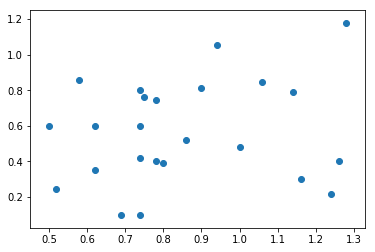

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#二つの目的関数
def f(x):
    return x[0]*x[2]+x[4]*x[1]+0.5

def g(x):
    return x[1]+x[3]*x[4]*x[5]

def val2ind(val,func_list):
    for i,value in enumerate(func_list):
        if value==val:
            index=i
    return index

def evaluate(f,g,S):
    return [[f(S[i]),g(S[i])] for i in range(train_num)]
    

#初期パラメータは大文字で書くべき
ind_mutation_rate=0.1
gene_mutation_rate=0.1
gene_num=6
ind_num=12
#初期集団
Q=[[np.random.randint(10)*0.1 for i in range(gene_num)] for j in range(ind_num)]
#エリート集団
P=[[np.random.randint(10)*0.1 for i in range(gene_num)] for j in range(ind_num)]

#main
R=Q+P
train_num=len(R)

#評価
eval_list=evaluate(f,g,R)
f_val=[f(R[i]) for i in range(train_num)]
g_val=[g(R[i]) for i in range(train_num)]

#解空間を描画
plt.figure()
plt.scatter(f_val,g_val)
plt.show()


In [2]:
#進化計算
import random
def crossover(parent):
    par1,par2=parent[0],parent[1]
    #二点交差
    idx=np.random.randint(0,gene_num-1)
    jdx=np.random.randint(idx,gene_num)
    
    child1=par1.copy()
    child2=par2.copy()
    
    child1=child1[:idx]+par2[idx:jdx]+child1[jdx:]
    child2=child2[:idx]+par1[idx:jdx]+child2[jdx:]
    return child1,child2
    
    
    
def mutate(Q):
    """N個の中で突然変異を起こす"""
    if np.random.rand()<ind_mutation_rate:
        idx=np.random.randint(ind_num)
        if np.random.rand()<gene_mutation_rate:
            gene_idx=np.random.randint(gene_num)
            Q[idx][gene_idx]=np.random.rand()#0-1の値
            
    return Q
 
    
def eval_2(x):
    return f(x),g(x)

def dis(family):
    distance=[]
    for i in range(len(family)):
        dis_x,dis_y=eval_2(family[i])
        distance.append(np.sqrt(dis_x**2+dis_y**2))
        
    return distance
         
    
def evolution(Q):
    Q_1=[]
    while len(Q_1)< ind_num:
        family=[]
        cross_ind=random.sample(Q,2)
        family.append(cross_ind[0])
        family.append(cross_ind[1])
        parent=cross_ind
        child1,child2=crossover(parent)
        family.append(child1)
        family.append(child2)
        distance=dis(family)
        
        family_sort=list(np.argsort(distance))
        new_family=[]
        for i in family_sort:
            new_family.append(family[i])
        Q_1.append(new_family[0])
        Q_1.append(new_family[1])
        
    Q_1=mutate(Q_1)
    return Q_1
        

In [3]:
#非優劣ソート

f_ranking=list(np.argsort(f_val))
f_ind=[i for i in range(train_num)]
print('initial f_ind:',f_ind)
individual_num=len(f_ind)
g_val_ranking=[]
for i in f_ranking:
    g_val_ranking.append(g_val[i])
    

rank_list=[]
count=1
while len(f_ranking)>0:
    print('=========%d times============='%(count))
    count+=1
    index=0
    individual_num=len(f_ind)
    rank=[]
    rank.append(f_ranking[index])
    index=1
    
    print('f_value:',f_val)
    while index<individual_num:
        if g_val_ranking[index]<min(g_val_ranking[:index]):
            rank.append(f_ranking[index])
        index+=1
    rank_list.append(rank)
    print('rank:',rank)
    print('rank_list:',rank_list)
    
    #個体の更新
    f_val_new=f_val.copy()
    rank_ind=0
    indiv_num=len(f_ind)
    f_ind_copy=f_ind
    while rank_ind < len(rank):
        for i in range(indiv_num-rank_ind):
            if f_ind_copy[i]==rank[rank_ind]:
                idx=i
                f_val_new=f_val_new[:idx]+f_val_new[idx+1:]
                f_ind=f_ind[:idx]+f_ind[idx+1:]
        f_ind_copy.pop(idx)
        rank_ind+=1
        
    print('f_individual:',f_ind)   
    f_ranking=f_ind.copy()
    sort=list(np.argsort(f_val_new))
    for i in range(len(sort)):
        f_ranking[i]=f_ind[sort[i]]
    print('individual_ranking:',f_ranking)
    f_val=f_val_new
    individual_num=len(f_ind)
    print('individual_number:',individual_num)
    g_val_ranking=[]
    for i in f_ranking:
        g_val_ranking.append(g_val[i])
        
    print('g_value_ranking:',g_val_ranking)

print(rank_list)    
    


initial f_ind: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
=========1 times=============
f_value: [0.74, 0.78, 0.8, 1.1600000000000001, 0.5800000000000001, 0.5, 1.2800000000000002, 0.62, 0.78, 1.06, 0.8600000000000001, 0.52, 1.26, 0.62, 1.1400000000000001, 0.74, 1.0, 1.2400000000000002, 0.74, 0.9400000000000001, 0.9000000000000001, 0.75, 0.74, 0.6900000000000001]
rank: [5, 11, 23, 18]
rank_list: [[5, 11, 23, 18]]
f_individual: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22]
individual_ranking: [4, 13, 7, 0, 15, 22, 21, 8, 1, 2, 10, 20, 19, 16, 9, 14, 3, 17, 12, 6]
individual_number: 20
g_value_ranking: [0.8560000000000001, 0.3520000000000001, 0.6000000000000001, 0.41800000000000004, 0.6000000000000001, 0.8, 0.7600000000000001, 0.4, 0.7430000000000001, 0.39200000000000007, 0.52, 0.8120000000000002, 1.052, 0.4800000000000001, 0.8440000000000001, 0.7920000000000001, 0.30000000000000004, 0.21800000000000003, 0.4, 1.18000000

In [4]:

#混雑度ソートにかける個体
F_ind=[]
length=0
length_list=[]
rank_num=0

print(rank_list)

index=0
while True:
    length+=len(rank_list[index])
    length_list.append(length)
    rank_num+=1
    if length>=ind_num:
        break
    index+=1
    

print('rank num:',rank_num)
print('rank length:',length)
print('length list:',length_list)

#混雑度ソートの分岐
if length==ind_num:
    #混雑度ソートしないときは以下のように次の世代を形成
    print('==go to evolution==')
    next_generation=[]
    for i in range(rank_num):
        for j in range(len(rank_list[i])):
            next_generation.append(rank_list[i][j])
    
    
elif length > ind_num:
    add_num=ind_num-length_list[rank_num-2]
    F_ind.append(rank_list[rank_num-1])
    
    #集団の個体番号
    F_ind_sort_before=F_ind[0]
    
    print('==sort before individuals==',F_ind_sort_before)
    #混雑度ソートにかける集団
    F=[]
    for i in range(len(R)):
        for j in range(len(F_ind_sort_before)):
            if i==F_ind_sort_before[j]:
                F.append(R[i])
                
    print('crowding individuals:',F)
    #混雑度ソートcrowd()
    F_f_val=[f(F[i]) for i in range(len(F))]
    F_g_val=[g(F[i]) for i in range(len(F))]

    
    #sort
    F_f_val_sort=sorted(F_f_val)
    F_f_val_sort_ind=list(np.argsort(F_f_val))
    
    F_ind_sort_after=[]
    for i in F_f_val_sort_ind:
        F_ind_sort_after.append(F_ind_sort_before[i])
        
    F_g_val_sort=sorted(F_g_val)
    
    print(F_f_val_sort)
    print('==sort after individuals==',F_ind_sort_after)
    print(F_g_val_sort)
    
    crowding_distance=[0 for _ in range(len(F_ind_sort_before))]
    
    
    print('add_num:',add_num)
    for idx,individual in enumerate(F_ind_sort_after):
        if idx==0 or idx==len(F_ind_sort_before)-1:
            crowding_distance[idx]=np.inf
            
        else:
            crowding_distance[idx]=abs((F_f_val[F_f_val_sort_ind[idx+1]]-F_f_val[F_f_val_sort_ind[idx+1]])/(max(F_f_val)-min(F_f_val))+(F_g_val[F_f_val_sort_ind[idx+1]]-F_g_val[F_f_val_sort_ind[idx-1]])/(max(F_g_val)-min(F_g_val)))
                
            
    #次の世代集団形成   
    crowding_ind_sort=list(np.argsort(crowding_distance))
    F_ind_sort=[]
    for i in crowding_ind_sort:
        F_ind_sort.append(F_ind_sort_after[i])
        
    print(F_ind_sort)
    
    next_generation=[]
    for i in range(rank_num-1):
        for j in range(len(rank_list[i])):
            next_generation.append(rank_list[i][j])
            
    for i in range(add_num):
        next_generation.append(F_ind_sort[i])
        
    
        
    
    
    #next_generation生成
    
print(next_generation)
Q_next=[]
for i in range(len(R)):
    for j in range(len(next_generation)):
        if i==next_generation[j]:
            Q_next.append(R[i])
            
#次の世代の集団            
print('natural competence before:',Q_next)
print(len(Q_next))

#ここで一世代の学習が終了する

Q_next=evolution(Q_next)
print('natural competence after:',Q_next)
print(len(Q_next))



[[5, 11, 23, 18], [4, 13, 3, 17], [7, 0, 8, 2], [15, 10, 16, 12], [22, 21, 1], [20, 14], [19, 9], [6]]
rank num: 3
rank length: 12
length list: [4, 8, 12]
==go to evolution==
[5, 11, 23, 18, 4, 13, 3, 17, 7, 0, 8, 2]
natural competence before: [[0.0, 0.4, 0.1, 0.1, 0.6000000000000001, 0.30000000000000004], [0.5, 0.0, 0.6000000000000001, 0.7000000000000001, 0.8, 0.7000000000000001], [0.6000000000000001, 0.30000000000000004, 0.9, 0.0, 0.4, 0.0], [0.0, 0.8, 0.4, 0.7000000000000001, 0.1, 0.8], [0.7000000000000001, 0.6000000000000001, 0.0, 0.6000000000000001, 0.0, 0.8], [0.4, 0.6000000000000001, 0.30000000000000004, 0.7000000000000001, 0.0, 0.2], [0.0, 0.4, 0.7000000000000001, 0.0, 0.7000000000000001, 0.2], [0.0, 0.2, 0.7000000000000001, 0.9, 0.1, 0.5], [0.30000000000000004, 0.1, 0.1, 0.7000000000000001, 0.9, 0.4], [0.9, 0.2, 0.8, 0.9, 0.1, 0.2], [0.4, 0.0, 0.6000000000000001, 0.6000000000000001, 0.4, 0.4], [0.6000000000000001, 0.1, 0.2, 0.8, 0.7000000000000001, 0.0]]
12
natural competence 

In [ ]:
#他に必要なハイパラメータ
epochs=40

#初期設定


for epoch in epochs:
    #進化計算(crossover,mutation,evolution)
    #評価
    #R集団の形成
    #非優劣ソート,rank
    #rank残りを混雑度ソート
    #Q_nextの形成
    